# Regularization

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.datasets import load_boston
from matplotlib import cm
import seaborn as sns
from scipy import stats

In [47]:
boston_dataset = load_boston()

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [48]:
dataFrame = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [49]:
dataFrame['MEDV'] = boston_dataset.target

In [50]:
dataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Check for NaN values

In [51]:
dataFrame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Select the input and output variables

In [52]:
input_feature = 'RM'
target = 'MEDV'

In [53]:
x = dataFrame[[input_feature]].values
y = dataFrame[[target]].values
X = dataFrame[[input_feature]]
Y = dataFrame[[target]]

# REGULARIZED GRADIENT DESCENT

## Regularized Gradient Descent loop-based implementation

$$\large J(\theta) = \frac{1}{2m}\Big[\sum_{i = 0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j = 1}^{n}\theta_{j}^2\Big]$$

$$\large \theta_j := \theta_j - \frac{\alpha}{m} \Big[ \sum_{i = 0}^{m-1} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j} + \lambda \theta_j\Big]$$

In [54]:
def costLoopBasedRegularized(x,y, theta =np.zeros((x.shape[1],1)) , lamb = 0.0):
    m = x.shape[0]
    n = x.shape[1]
    J = 0
    theta_reg = 0

    elapsed_time = 0
    elapsed_time -= time.time()
    for i in range(m): # iterate on over all the input example
        h = 0
        for j in range (n): # iterate over each input feature
            
            h += theta[j]*x[i][j]
            
        J += (h - y[i])**2 ##individual loss
    
    for l in range (1,n):
        theta_reg += theta[l]**2
    theta_reg *= lamb
    J += theta_reg
        
    J = J/(2*m),3
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [55]:
def polinomyal_features(dataFrame, degree, column):
    
    new_dataFrame = dataFrame.copy()
    for i in range(1,degree):
        column_name = '('+column + ')**{}'.format(i+1)
        new_dataFrame[column_name] = dataFrame[column]**(i+1)

    return new_dataFrame

In [56]:
def featureScaling(X):
    
    Z = pd.DataFrame.copy(X)
    mu = np.mean(Z, axis = 0) #axis = 0 lo fa per le colonne
    std = np.std(Z, axis = 0)
    
    Z = (Z - mu)/std
 
    return Z

In [102]:
x_poly_2_scaled = featureScaling(polinomyal_features(X,2,input_feature))
x_poly_5_scaled = featureScaling(polinomyal_features(X,5,input_feature))

x_poly_2_scaled_int = np.c_[np.ones((x_poly_2_scaled.shape[0],1)), x_poly_2_scaled]
x_poly_5_scaled_int = np.c_[np.ones((x_poly_5_scaled.shape[0],1)), x_poly_5_scaled]

In [58]:
def gradientDescentLoopRegularized(x, y, theta = np.zeros((x.shape[1],1)), alpha = 0.003, max_iters = 20000, early = False, epsilon = 0.00001, lamb = 0.0):
    
    m = x.shape[0]
    n = x.shape[1]
    J_history = np.zeros((max_iters,1))
    theta_history = []
    theta_mask = np.ones((n,1))
    theta_mask[0] = 0

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costLoopBasedRegularized(x,y, theta_gd, lamb = lamb)
        theta_history.append(np.copy(theta_gd))
        h = np.zeros((m,1))
        partial = np.zeros((n,1))
        
        for i in range(m):
            for j in range(n):
                h[i] += theta_gd[j]*x[i][j]
            
            for j in range(n):
                partial[j] += (h[i] - y[i])*x[i][j] 
                
        #simultaneously update each parameter        
        for j in range(n):
            theta_gd[j] = theta_gd[j] - ((alpha/m)*partial[j] + lamb*theta_gd[j]*theta_mask[j])
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [59]:
gradientDescentLoopRegularized(x_poly_2_scaled_int, y, theta = np.zeros((x_poly_2_scaled_int.shape[1],1)), alpha = 0.001, max_iters = 1000, early = False, epsilon = 0.00001, lamb = 0.5)

(array([[1.42475965e+01],
        [1.27263506e-02],
        [1.31454903e-02]]),
 array([[296.073],
        [295.482],
        [294.933],
        [294.407],
        [293.892],
        [293.384],
        [292.879],
        [292.376],
        [291.875],
        [291.375],
        [290.877],
        [290.379],
        [289.883],
        [289.387],
        [288.893],
        [288.399],
        [287.907],
        [287.415],
        [286.925],
        [286.435],
        [285.947],
        [285.459],
        [284.973],
        [284.487],
        [284.002],
        [283.519],
        [283.036],
        [282.554],
        [282.073],
        [281.594],
        [281.115],
        [280.637],
        [280.16 ],
        [279.684],
        [279.209],
        [278.735],
        [278.262],
        [277.789],
        [277.318],
        [276.848],
        [276.378],
        [275.91 ],
        [275.442],
        [274.976],
        [274.51 ],
        [274.046],
        [273.582],
        [273.119],
        

## Gradient Descent Vectorized

$$\large J(\theta) = \frac{1}{2m} \Big[(X\theta - y)^T (X\theta - y) + \lambda*\theta_{r}^T\theta_{r}\Big]$$

$$\large \theta_{r} := \theta_{r} - \frac{\alpha}{m}\Big[X^T(X\theta_{r} - y) + \lambda * \theta_{r}\Big]$$

In [60]:
def costVectorialRegularized(x,y, theta= np.zeros((x.shape[1],1)), lamb = 0.0):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    # il primo elemento non lo prendo
    J = (x.dot(theta) - y).T.dot((x.dot(theta) - y)) + lamb*(theta[1:].T.dot(theta[1:]))
    J = J/(2*m)

    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [61]:
def gradientDescentVectorizedReg(x, y, theta = np.zeros((x.shape[1],1)), alpha = 0.001, max_iters = 200000, early = False, epsilon = 0.00001, lamb = 0.0):
    
    m = x.shape[0]

    J_history = np.zeros((max_iters,1))
    theta_history = []

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costVectorialRegularized(x,y, theta = theta_gd)
        
        theta_gd = theta_gd - (alpha/m) *(x.T.dot(x.dot(theta_gd) - y) + lamb*np.r_[[[0]], theta_gd[1:]].reshape(-1,1))
        theta_history.append(np.copy(theta_gd))        
        
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [62]:
gradientDescentVectorizedReg(x_poly_2_scaled_int, y, theta = np.zeros((x_poly_2_scaled_int.shape[1],1)), alpha = 0.001, max_iters = 10000, early = False, epsilon = 0.00001, lamb = 10)

(array([[22.53178844],
        [ 2.29773322],
        [ 4.14995648]]),
 array([[296.073],
        [295.482],
        [294.891],
        ...,
        [ 20.88 ],
        [ 20.88 ],
        [ 20.88 ]]),
 510.06,
 [array([[0.02253281],
         [0.00638898],
         [0.00659855]]),
  array([[0.04504308],
         [0.01276487],
         [0.01318401]]),
  array([[0.06753084],
         [0.01912772],
         [0.01975642]]),
  array([[0.08999612],
         [0.02547754],
         [0.0263158 ]]),
  array([[0.11243893],
         [0.03181436],
         [0.03286217]]),
  array([[0.1348593 ],
         [0.03813821],
         [0.03939557]]),
  array([[0.15725724],
         [0.04444912],
         [0.04591601]]),
  array([[0.17963279],
         [0.0507471 ],
         [0.05242353]]),
  array([[0.20198597],
         [0.05703219],
         [0.05891815]]),
  array([[0.22431679],
         [0.06330441],
         [0.06539989]]),
  array([[0.24662528],
         [0.06956378],
         [0.07186879]]),
  array([[

# Regularized Normal Equation

$$\large \theta = (X^T X)^{-1}X^T y$$

$$\large \theta = (X^T X + \lambda * I_{r})^{-1}X^T y$$

In [97]:
def normalEquationReg(x, y, lamb = 0.0):
    start_time = time.time()
    
    identity_r = np.eye(x.shape[1])
    identity_r[0][0] = 0
    
    theta = np.linalg.inv(x.T.dot(x) + lamb * identity_r).dot(x.T).dot(y)
    
    end_time = time.time()
    
    etime = np.round(end_time*1000 - start_time*1000, 3) # [ms]
    return theta, etime

In [101]:
normalEquationReg(x_poly_2_scaled_int, y, lamb = 0.1)

(array([[ 22.53280632],
        [-15.22662946],
        [ 21.73756119]]),
 0.612)

# Effects of REGULARIZATION

## small lambda

In [157]:
theta_gd, cost_history,_,theta_history = gradientDescentVectorizedReg(x_poly_5_scaled_int, y, theta = np.zeros((x_poly_5_scaled_int.shape[1],1)), alpha = 0.001, max_iters = 1000, early = False, epsilon = 0.00001, lamb = 0.1)

In [158]:
theta0_hist = []
theta1_hist = []
theta2_hist = []
theta3_hist = []
theta4_hist = []
theta5_hist = []

for i in theta_history:
    theta0_hist.append(i[0])
    theta1_hist.append(i[1])
    theta2_hist.append(i[2])
    theta3_hist.append(i[3])
    theta4_hist.append(i[4])
    theta5_hist.append(i[5])
    

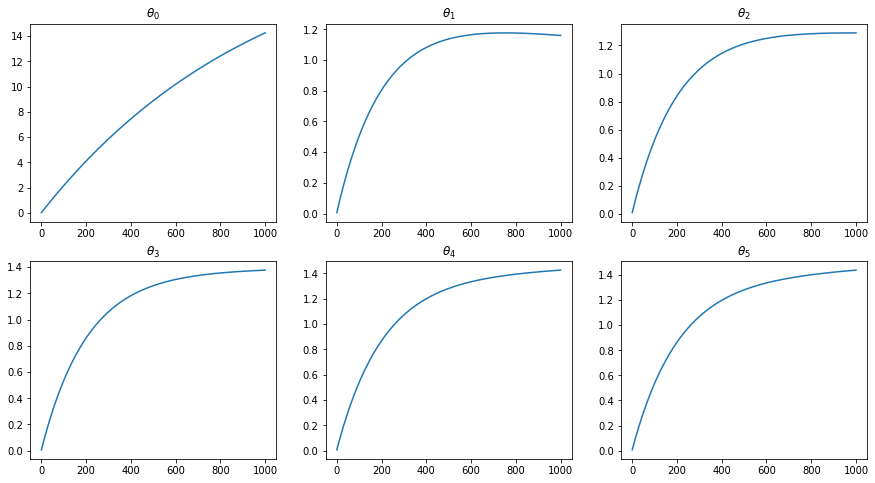

In [159]:
fig = plt.figure(figsize = (15,8))

ax11 = fig.add_subplot(2,3,1)
ax11.plot(theta0_hist)
ax11.set_title(r"$\theta_0$")

ax12 = fig.add_subplot(2,3,2)
ax12.plot(theta1_hist)
ax12.set_title(r"$\theta_1$")

ax13 = fig.add_subplot(2,3,3)
ax13.plot(theta2_hist)
ax13.set_title(r"$\theta_2$")

ax21 = fig.add_subplot(2,3,4)
ax21.plot(theta3_hist)
ax21.set_title(r"$\theta_3$")

ax22 = fig.add_subplot(2,3,5)
ax22.plot(theta4_hist)
ax22.set_title(r"$\theta_4$")

ax23 = fig.add_subplot(2,3,6)
ax23.plot(theta5_hist)
ax23.set_title(r"$\theta_5$")

plt.show()


## Large Lambda

In [160]:
theta_gd,cost_history,_,theta_history = gradientDescentVectorizedReg(x_poly_5_scaled_int, y, theta = np.random.rand(x_poly_5_scaled_int.shape[1],1), alpha = 0.001, max_iters = 1000, early = False, epsilon = 0.00001, lamb = 100000)

In [161]:
theta0_hist = []
theta1_hist = []
theta2_hist = []
theta3_hist = []
theta4_hist = []
theta5_hist = []

for i in theta_history:
    theta0_hist.append(i[0])
    theta1_hist.append(i[1])
    theta2_hist.append(i[2])
    theta3_hist.append(i[3])
    theta4_hist.append(i[4])
    theta5_hist.append(i[5])
    

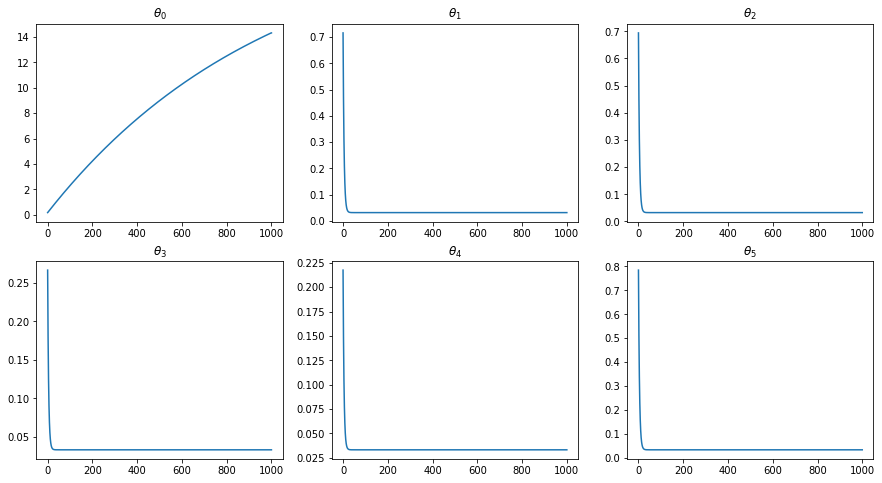

In [162]:
fig = plt.figure(figsize = (15,8))

ax11 = fig.add_subplot(2,3,1)
ax11.plot(theta0_hist)
ax11.set_title(r"$\theta_0$")

ax12 = fig.add_subplot(2,3,2)
ax12.plot(theta1_hist)
ax12.set_title(r"$\theta_1$")

ax13 = fig.add_subplot(2,3,3)
ax13.plot(theta2_hist)
ax13.set_title(r"$\theta_2$")

ax21 = fig.add_subplot(2,3,4)
ax21.plot(theta3_hist)
ax21.set_title(r"$\theta_3$")

ax22 = fig.add_subplot(2,3,5)
ax22.plot(theta4_hist)
ax22.set_title(r"$\theta_4$")

ax23 = fig.add_subplot(2,3,6)
ax23.plot(theta5_hist)
ax23.set_title(r"$\theta_5$")

plt.show()


# Plot the hypothesis

In [174]:
X_5, yhat_5 = zip(*sorted(zip(x,x_poly_5_scaled_int.dot(theta_gd))))

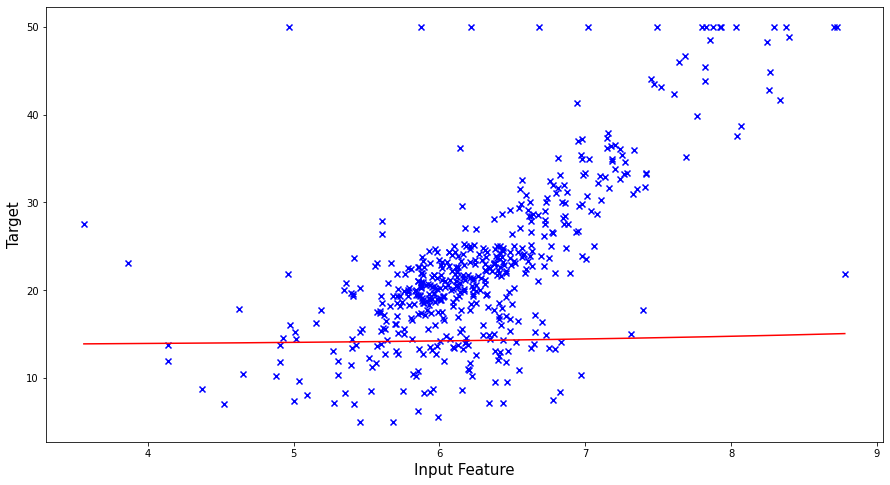

In [178]:
plt.figure(figsize=(15,8))
plt.scatter(x, y, marker = 'x', c='b')
plt.plot(X_5, yhat_5, c='r')
plt.xlabel("Input Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.show()